In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Your additional code goes here


In [2]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Preprocessing

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Encoding

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [10]:
df['ocean_proximity']=df['ocean_proximity'].map({"<1H OCEAN":0,"INLAND":1,"NEAR OCEAN":2,"NEAR BAY":3,"ISLAND":4})

### Train Test Split

In [11]:
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [12]:
X=np.array(X)
y=np.array(y)

In [13]:
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  3.0000e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.0000e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.0000e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  1.0000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  1.0000e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  1.0000e+00]])

In [14]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (16346, 9)
X_test shape (4087, 9)
y_train shape (16346,)
y_test shape (4087,)


### Scaling

In [17]:
scaler=MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test )

### Model Training

In [18]:
X_train.shape

(16346, 9)

In [19]:
model = Sequential([
    # Input layer
    Dense(1000, input_shape=(9,), activation='relu'),

    # Hidden layer 1
    Dense(500, activation='relu'),

    # Hidden layer 2
    Dense(250, activation='relu'),

    # Output layer
    Dense(1, activation='linear')
])

C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │          10,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)


In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[es], epochs=10, verbose=1, batch_size=50)


Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 42367115264.0000 - mae: 169441.4219 - val_loss: 11553354752.0000 - val_mae: 86090.0391
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 10442413056.0000 - mae: 81203.5312 - val_loss: 8250011136.0000 - val_mae: 72150.1641
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7263086080.0000 - mae: 66055.3672 - val_loss: 6130249216.0000 - val_mae: 57465.1641
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5870336512.0000 - mae: 56628.5078 - val_loss: 5924214272.0000 - val_mae: 57637.3242
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5656210432.0000 - mae: 54964.9141 - val_loss: 5736337920.0000 - val_mae: 55279.9453
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5729547776.0000 - mae: 55415.5078 - val_loss: 5677700608.0000 - val_mae: 53367.9102
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5398194688.0000 - mae: 53551.4570 - val_loss: 5405669376.0000 - val_mae:

### Model Result and prediction

In [23]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

y_pred= model.predict(X_test)


print("Mean square error: ",mean_squared_error(y_test,y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))



128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean square error:  5013759315.806965
Mean absolute error:  52724.71016953526
R2 score:  0.6333679682741773


In [27]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

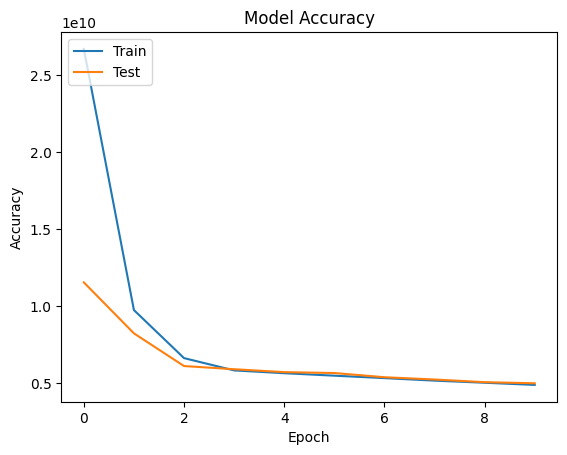

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

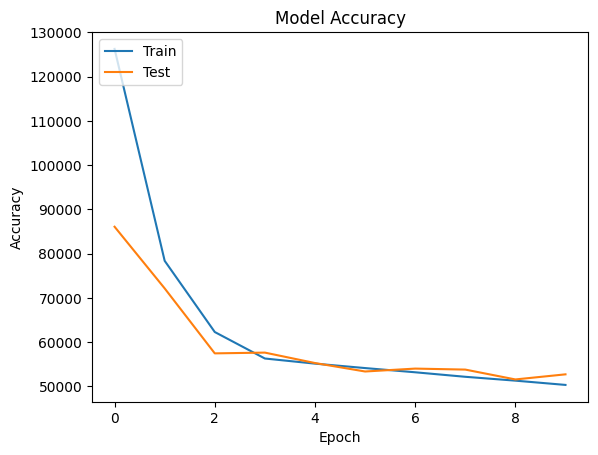

In [28]:
# Plotting accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
df.iloc[0]

longitude               -122.2300
latitude                  37.8800
housing_median_age        41.0000
total_rooms              880.0000
total_bedrooms           129.0000
population               322.0000
households               126.0000
median_income              8.3252
median_house_value    452600.0000
ocean_proximity            3.0000
Name: 0, dtype: float64

### Predictive System

In [30]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    feature = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    scaled  = scaler.fit_transform([feature])
    output= model.predict(scaled).reshape(1,-1)
    return output[0]

In [31]:
longitude=-122.2300
latitude=37.8800
housing_median_age=41.0000
total_rooms=880.0000
total_bedrooms=129.0000
population=322.0000
households=126.0000
median_income=8.3252
#median_house_value=452600.0000
ocean_proximity=3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [33]:
price[0]

255758.97

### Save Model

In [38]:
model.save('dl_housing.keras')

import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
